In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Loads the aligned trajectory
import MDAnalysis as mda
ref = mda.Universe('protein.pdb')
sim = mda.Universe('protein.pdb', '0/1ubq000_protein.dcd')

# Principal components analysis

In [3]:
import MDAnalysis.analysis.pca as pca
sim_pca = pca.PCA(sim, select='protein and name CA')
sim_pca.run(start=40)

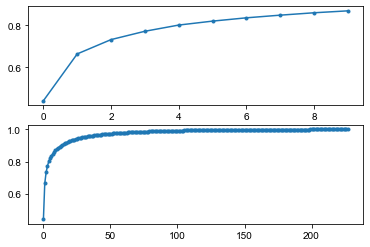

In [4]:
plt.subplot(2,1,1)
plt.plot(sim_pca.cumulated_variance[:10],'.-')
plt.subplot(2,1,2)
plt.plot(sim_pca.cumulated_variance,'.-')

The majority of the variance can be explained with two dimensions

In [5]:
atomgroup = sim.select_atoms('protein and name CA')
pca_space = sim_pca.transform(atomgroup, n_components=10)

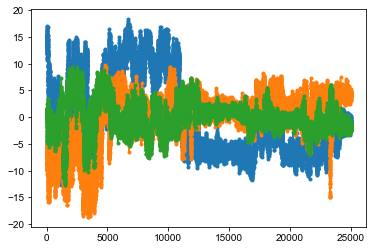

In [6]:
plt.plot(pca_space[:,0],'.-')
plt.plot(pca_space[:,1],'.-')
plt.plot(pca_space[:,2],'.-')

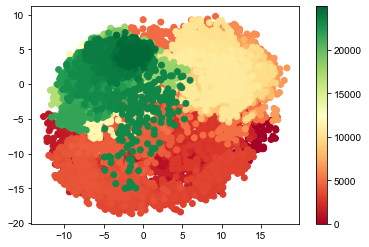

In [7]:
plt.scatter(pca_space[:,0], pca_space[:,1], c=range(pca_space.shape[0]), cmap="RdYlGn")
plt.colorbar()